# Seasonal decomposition examples

Examples of the Aditive Seasonal Decomposition for each type of bearing using the [_statsmodels_](https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) library.

This type of decomposition was not able to extract components of the time series

## Import libraries

In [43]:
import scipy.io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

## Load data

One bearing for each type for example

In [44]:
# normal
k001 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\K001\\N09_M07_F10_K001_1.mat',appendmat=False)['N09_M07_F10_K001_1']['Y']

vibration = k001[0][0][0][6][2][0]
phase_current_1 = k001[0][0][0][1][2][0]
phase_current_2 = k001[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_k001 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_k001['bearing'] = 'k001'

In [45]:
# artificially damage
ka01 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\KA01\\N09_M07_F10_KA01_1.mat',appendmat=False)['N09_M07_F10_KA01_1']['Y']

vibration = ka01[0][0][0][6][2][0]
phase_current_1 = ka01[0][0][0][1][2][0]
phase_current_2 = ka01[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_ka01 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_ka01['bearing'] = 'ka01'

In [46]:
# accelerated lifetime
ka04 = scipy.io.loadmat('C:\\Users\\julia\\Documents\\UNICAMP\\TCC\\KAT\\KA04\\N09_M07_F10_KA04_1.mat',appendmat=False)['N09_M07_F10_KA04_1']['Y']

vibration = ka04[0][0][0][6][2][0]
phase_current_1 = ka04[0][0][0][1][2][0]
phase_current_2 = ka04[0][0][0][2][2][0]

d = dict(vibration = vibration, phase_current_1 = phase_current_1, phase_current_2 = phase_current_2)

df_ka04 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
df_ka04['bearing'] = 'ka01'

In [47]:
def apply_seasonal_decompose(array):

    decomposed = seasonal_decompose(array,model='additive',period = 1)

    trend = decomposed.trend
    seasonal = decomposed.seasonal
    residuals = decomposed.resid

    return trend, seasonal, residuals

## Normal

In [48]:
# Aditive Decomposition

k001_trend, k001_seasonal,k001_residuals = apply_seasonal_decompose(df_k001['vibration'].values)

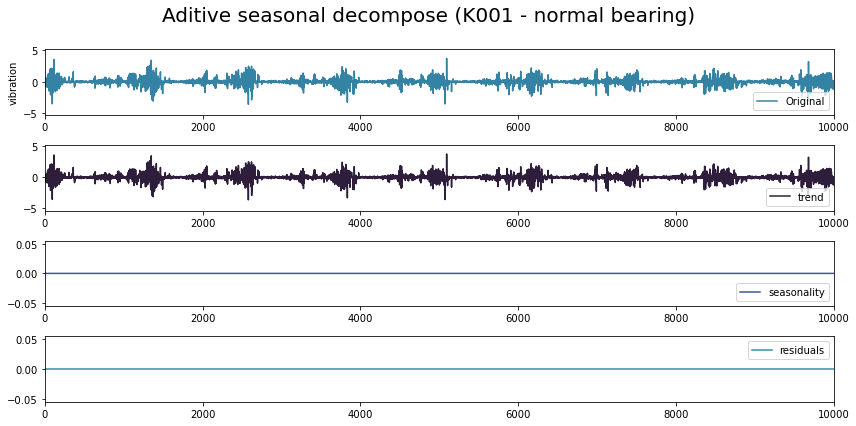

In [49]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(12, 6))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_k001['vibration'], label='Original',ax=ax[0],color=cmap[10])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

sns.lineplot(k001_trend, label='trend',ax=ax[1],color=cmap[2])
ax[1].set_xlim(0,10000)
ax[1].legend(loc="lower right")

sns.lineplot(k001_seasonal, label='seasonality',ax=ax[2],color=cmap[7])
ax[2].set_xlim(0,10000)
ax[2].legend(loc="lower right")

sns.lineplot(k001_residuals, label='residuals',ax=ax[3],color=cmap[11])
ax[3].set_xlim(0,10000)
ax[3].legend(loc="lower right")

plt.suptitle('Aditive seasonal decompose (K001 - normal bearing)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Artificial damaged

In [50]:
# Aditive Decomposition

ka01_trend, ka01_seasonal,ka01_residuals = apply_seasonal_decompose(df_ka01['vibration'].values)

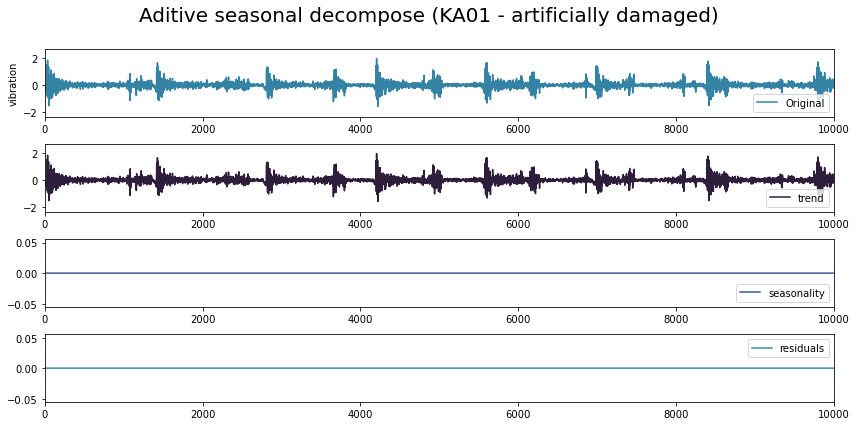

In [51]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(12, 6))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_ka01['vibration'], label='Original',ax=ax[0],color=cmap[10])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

sns.lineplot(ka01_trend, label='trend',ax=ax[1],color=cmap[2])
ax[1].set_xlim(0,10000)
ax[1].legend(loc="lower right")

sns.lineplot(ka01_seasonal, label='seasonality',ax=ax[2],color=cmap[7])
ax[2].set_xlim(0,10000)
ax[2].legend(loc="lower right")

sns.lineplot(ka01_residuals, label='residuals',ax=ax[3],color=cmap[11])
ax[3].set_xlim(0,10000)
ax[3].legend(loc="lower right")

plt.suptitle('Aditive seasonal decompose (KA01 - artificially damaged)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

## Accelerated lifetime

In [52]:
# Aditive Decomposition

ka04_trend, ka04_seasonal,ka04_residuals = apply_seasonal_decompose(df_ka04['vibration'].values)

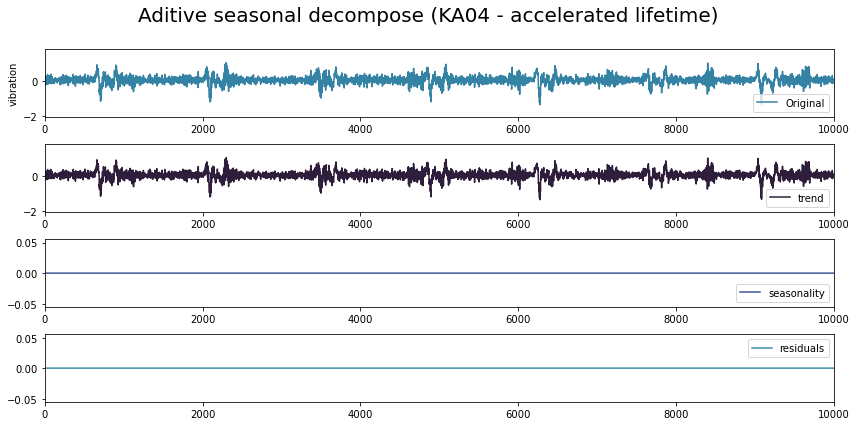

In [53]:
# Show the results for the first time series and its subseries
fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(12, 6))

cmap = sns.color_palette("mako",20)

sns.lineplot(df_ka04['vibration'], label='Original',ax=ax[0],color=cmap[10])
ax[0].set_xlim(0,10000)
ax[0].legend(loc="lower right")

sns.lineplot(ka04_trend, label='trend',ax=ax[1],color=cmap[2])
ax[1].set_xlim(0,10000)
ax[1].legend(loc="lower right")

sns.lineplot(ka04_seasonal, label='seasonality',ax=ax[2],color=cmap[7])
ax[2].set_xlim(0,10000)
ax[2].legend(loc="lower right")

sns.lineplot(ka04_residuals, label='residuals',ax=ax[3],color=cmap[11])
ax[3].set_xlim(0,10000)
ax[3].legend(loc="lower right")


plt.suptitle('Aditive seasonal decompose (KA04 - accelerated lifetime)', fontsize=20)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()